In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import random
import colorsys

# Clustering By RGB

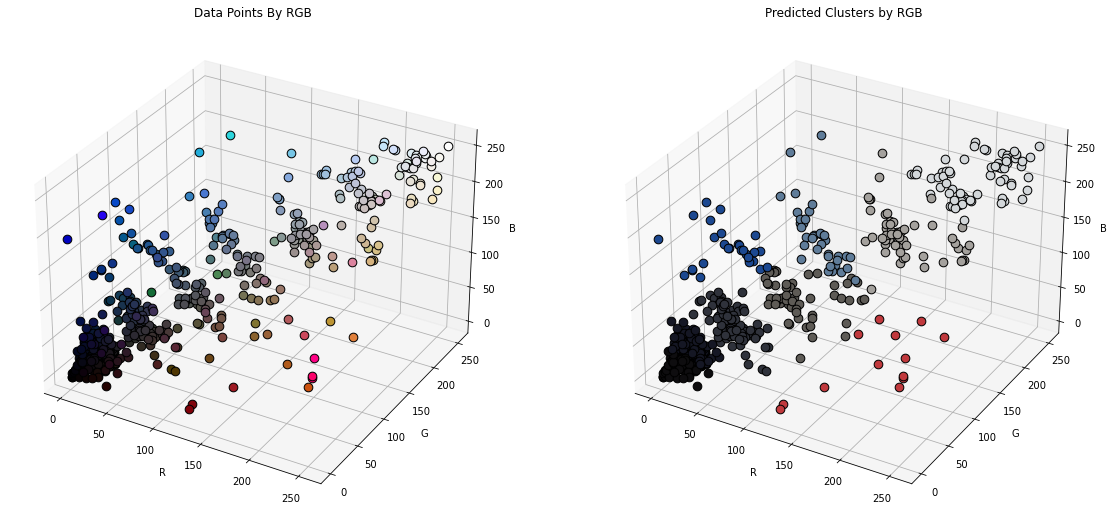

In [22]:
df = pd.read_csv("../data_sandstorm_new.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = []
for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    X.append(rgb)

sil_score_max = -1 # this is the minimum possible score
best_n_clusters = 0
model = None

n_clusters = 9

model = KMeans(n_clusters=n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)


# fit data and generate predictions
model.fit(X)
y_pred = model.labels_
centers = model.cluster_centers_


#plot
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(122, projection='3d')
ax1.set_title("Predicted Clusters by RGB")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

color_classes = {}

for i, p in enumerate(X):
    if y_pred[i] in color_classes:
        color_classes[y_pred[i]].append(X)
    else:
        color_classes[y_pred[i]] = [X]
        
p_size = 75

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    c_pred = np.array([x/255 for x in centers[y_pred[i]]]) # colors_pred[y_pred[i]]
        
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, color=c_pred, edgecolors='black', s=p_size)
    
plt.show()

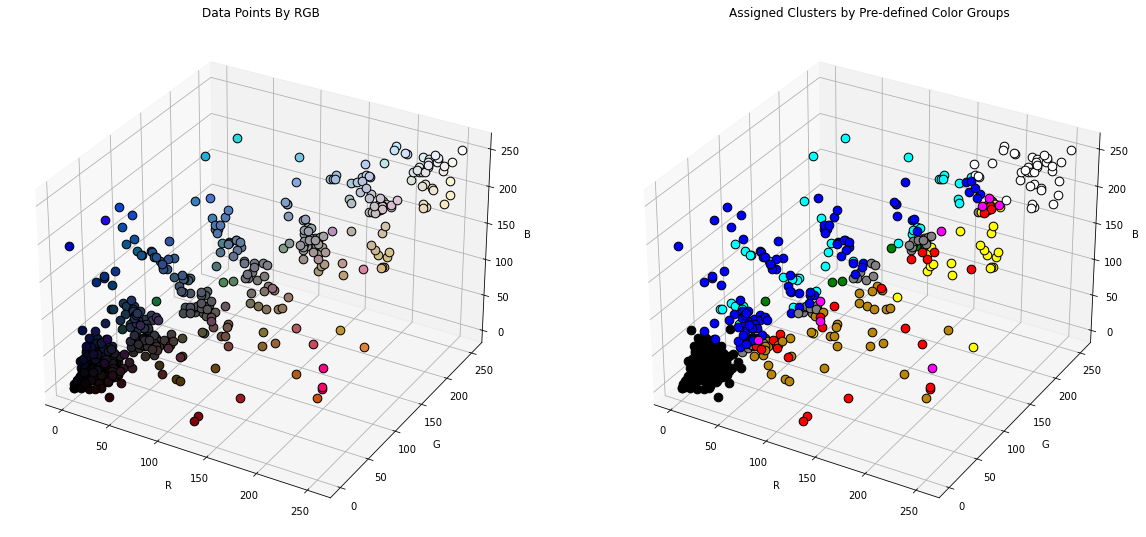

In [23]:
def classify(c):
    hue = c[0]*360
    lgt = c[1]
    sat = c[2]

    if (lgt < 0.15):  return "Blacks"
    if (lgt > 0.8):  return "Whites"

    if (sat < 0.05): return "Grays"
    
    if (hue<60 and lgt<=0.5): return "Browns"

    if (hue < 10):   return "Reds"
    if (hue < 90):   return "Yellows"
    if (hue < 150):  return "Greens"
    if (hue < 210):  return "Cyans"
    if (hue < 270):  return "Blues"
    if (hue < 330):  return "Magentas"
    
    return "Reds"

bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = [] # rgb
X_hls = [] # hls

for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    rgb_norm = [x/255 for x in rgb]
    hls = colorsys.rgb_to_hls(*rgb_norm)
    X.append(rgb)
    X_hls.append(hls)
    
colors_pred = {"Blacks" : "black",
              "Whites" : "white",
              "Grays" : "gray",
              "Browns" : "darkgoldenrod",
               "Reds" : "red",
               "Yellows" : "yellow",
               "Greens" : "green",
               "Cyans" : "cyan",
               "Blues" : "blue",
               "Magentas" : "magenta",
               "Pinks" : "pink"
              }
    
y_pred = [classify(i) for i in X_hls]

#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(122, projection='3d')
ax1.set_title("Assigned Clusters by Pre-defined Color Groups")
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    c_pred = colors_pred[y_pred[i]]
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, c=colors_pred[y_pred[i]], edgecolors='black', s=p_size)

plt.show()

# Clustering By HLS

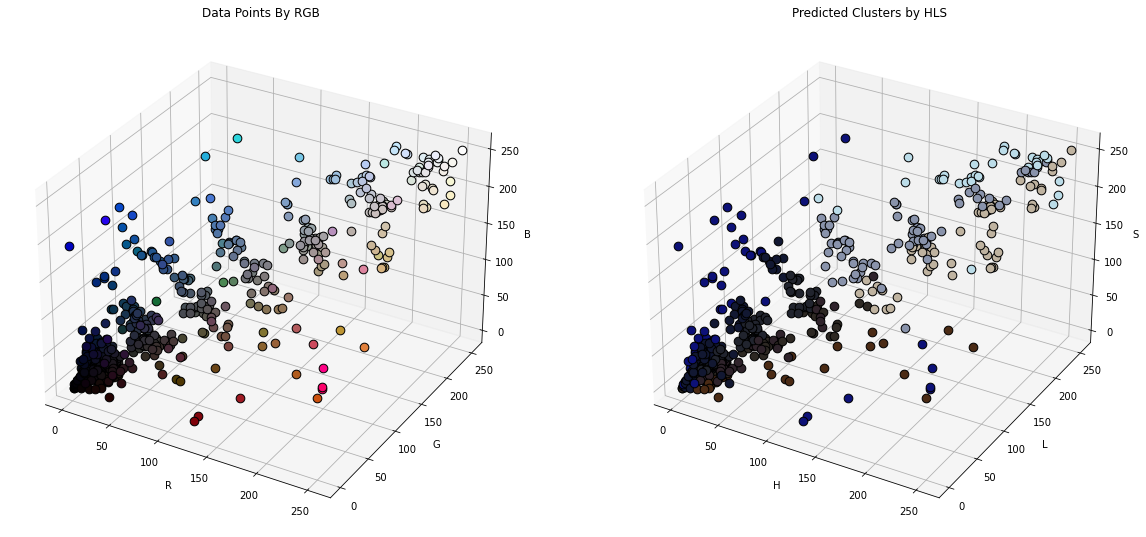

In [24]:
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

# save rgb values as hls values
X = []
for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    X.append(rgb)

X_hls = [] # hls

for color_point in X:
    pass

for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    rgb_norm = [x/255 for x in rgb]
    hls = colorsys.rgb_to_hls(*rgb_norm)
    X_hls.append(hls)

sil_score_max = -1 # this is the minimum possible score
best_n_clusters = 0
model = None

model = KMeans(n_clusters=n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)


# fit data and generate predictions
model.fit(X_hls)
y_pred = model.labels_
centers = model.cluster_centers_


#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(122, projection='3d')
ax1.set_title("Predicted Clusters by HLS")
ax1.set_xlabel('H')
ax1.set_ylabel('L')
ax1.set_zlabel('S')
    
color_classes = {}

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    hls = ([x for x in centers[y_pred[i]]]) # colors_pred[y_pred[i]]
    rgb = colorsys.hls_to_rgb(*hls)
    c_pred = np.array([x for x in rgb])
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, color=c_pred, edgecolors='black', s=p_size)
    
plt.show()